# Classification task with the CIFAR10 dataset using Keras

In the project below, we will model the classifiers with the CIFAR10 dataset using Keras.

We will train a Two-layers Neural Network and then a Convolutional Neural Network. Also, the use of some regularization techniques will be advised to increase the accuracy and avoid the overfitting .

## Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras import optimizers

Using TensorFlow backend.


## Loading the dataset

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


We have 50000 training and 10000 test images in the dataset. The images have a structure of (32,32,3 - width, height, RGB, respectively).


## Display some random images

In [0]:
# Helper function to plot some images in the dataset
def plot_cifar10(class_name=None):
  mapping = {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4,
            'dog': 5, 'fog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
  
  if class_name == None:
    fig, ax = plt.subplots(10, 10, sharey=True, figsize=(11,10))
    for j in range(10):
      class_index = (y_train == j)[:,0]
      class_imgs = X_train[class_index,:,:][np.random.choice(5000, 10),:,:]
      for i, img in enumerate(class_imgs):
        ax[j,i].imshow(img)
        ax[j,i].grid('off')
        ax[j,i].set_xticks([])
        ax[j,i].set_yticks([])
        if i == 0:
          ax[j,i].set_ylabel(list(mapping.keys())[j])
  else:
    class_index = (y_train == mapping[class_name])[:,0]
    class_imgs = X_train[class_index,:,:][np.random.choice(5000, 10),:,:]
    fig, ax = plt.subplots(1, 10, sharey=True, figsize=(22,2))
    for i, img in enumerate(class_imgs):
      ax[i].imshow(img)
      ax[i].grid('off')
      ax[i].set_xticks([])
      ax[i].set_yticks([])
      if i == 0:
        ax[i].set_ylabel(class_name)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


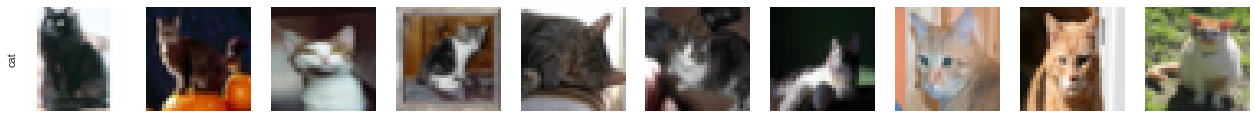

In [5]:
plot_cifar10('cat')

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


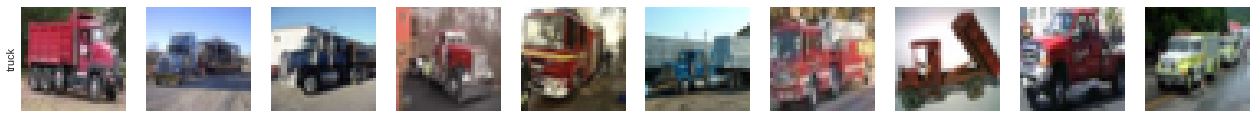

In [6]:
plot_cifar10('truck')

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


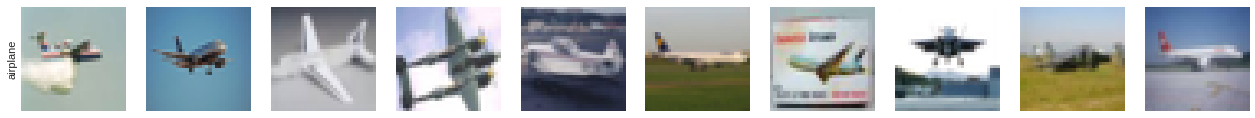

In [7]:
plot_cifar10('airplane')

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


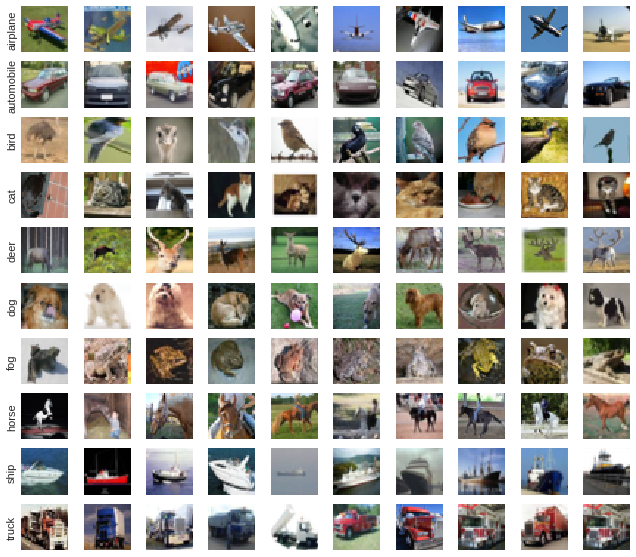

In [8]:
# Display 10 random images from each class
plot_cifar10()

## MLP Classifier



### Preparing the dataset

First we are going to use a Multilayer Perceptron to classify the images in CIFAR10 dataset.

Instead of class indices we will use one-hot encoded vectors to represent the labels of the samples. We also need to vectorize the images, since the MLP will take a 3072-dimensional vector as the input. When working with images, a simple way to normalize our data is to fit it within the 0 to 1 range.

In [0]:
# Transform label indices to one-hot encoded vectors

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

X_train = np.reshape(X_train,(50000,3072))
X_test = np.reshape(X_test,(10000,3072))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization of pixel values (to [0-1] range)

X_train /= 255
X_test /= 255

### Train a two-layers neural network

In [0]:
# 2-layers NN
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=32 * 32 * 3))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Configure the optimizer
adam = optimizers.Adam(lr=0.001)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Let's train our model now! We will store the training loss values and accuracy values in a history object, so we can visualize the training process later.

We are going to train the model for 20 epochs, using a batch size of 64.

In [11]:
history = model.fit(X_train,y_train, epochs=20, 
                    batch_size=64 , validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 4s 107us/step - loss: 1.8712 - acc: 0.3243 - val_loss: 1.7409 - val_acc: 0.3752
Epoch 2/20
40000/40000 [==============================] - 3s 87us/step - loss: 1.7088 - acc: 0.3870 - val_loss: 1.6843 - val_acc: 0.3989
Epoch 3/20
40000/40000 [==============================] - 3s 87us/step - loss: 1.6377 - acc: 0.4131 - val_loss: 1.6548 - val_acc: 0.4105
Epoch 4/20
40000/40000 [==============================] - 4s 88us/step - loss: 1.5878 - acc: 0.4344 - val_loss: 1.6023 - val_acc: 0.4259
Epoch 5/20
40000/40000 [==============================] - 4s 92us/step - loss: 1.5546 - acc: 0.4461 - val_loss: 1.6278 - val_acc: 0.4200
Epoch 6/20
40000/40000 [==============================] - 4s 89us/step - loss: 1.5234 - acc: 0.4531 - val_loss: 1.5641 - val_acc: 0.4478
Epoch 7/20
40000/40000 [==============================] - 4s 88us/step - loss: 1.4910 - acc: 0.4685 - val_loss: 1.5398 - val_ac

Let try to plot our training history (loss values and accuracy values)

In [0]:
def plotLoss(history):  
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, 21)
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

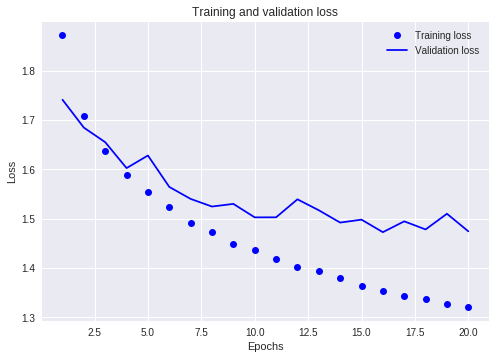

In [13]:
plotLoss(history)

In [0]:
def plotaccuracy(history):
  history_dict = history.history
  acc_values = history_dict['acc']
  val_acc_values = history_dict['val_acc']
  epochs = range(1, 21)
  plt.plot(epochs, acc_values, 'bo', label='Training acc')
  plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

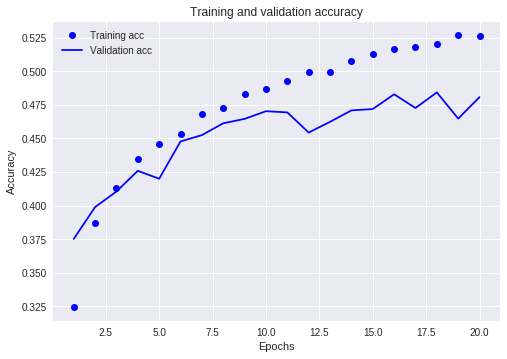

In [15]:
plotaccuracy(history)

### Evaluating the MLP

In [16]:
score = model.evaluate(X_test, y_test, batch_size=64)

10000/10000 [==============================] - 0s 30us/step


In [17]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[1.4515095909118652, 0.4849]


## CNN Classifier

Now we will train a Convolutional Neural Network model and compare with above MLP model.

### Preparing the dataset

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [19]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 10)
Shape of test data:
(10000, 32, 32, 3)
(10000, 10)


### Train the CNN model

In [0]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

In [0]:
# Configure the optimizer
adam = optimizers.Adam(lr=0.001)
cnn_model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                65600     
__________

In [23]:
history_cnn = cnn_model.fit(X_train, y_train, epochs=20, 
                            batch_size=64 , validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 9s 218us/step - loss: 1.6234 - acc: 0.4033 - val_loss: 1.3651 - val_acc: 0.5082
Epoch 2/20
40000/40000 [==============================] - 8s 194us/step - loss: 1.2748 - acc: 0.5457 - val_loss: 1.2055 - val_acc: 0.5743
Epoch 3/20
40000/40000 [==============================] - 8s 194us/step - loss: 1.1154 - acc: 0.6046 - val_loss: 1.0894 - val_acc: 0.6185
Epoch 4/20
40000/40000 [==============================] - 8s 194us/step - loss: 1.0108 - acc: 0.6451 - val_loss: 1.0539 - val_acc: 0.6335
Epoch 5/20
40000/40000 [==============================] - 8s 195us/step - loss: 0.9327 - acc: 0.6722 - val_loss: 0.9448 - val_acc: 0.6737
Epoch 6/20
40000/40000 [==============================] - 8s 194us/step - loss: 0.8695 - acc: 0.6955 - val_loss: 0.9415 - val_acc: 0.6711
Epoch 7/20
40000/40000 [==============================] - 8s 194us/step - loss: 0.8234 - acc: 0.7105 - val_loss: 0.9109 - 

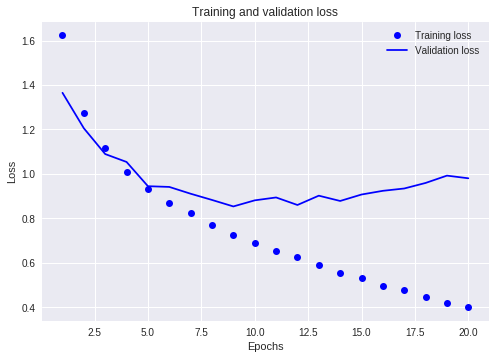

In [24]:
plotLoss(history_cnn)

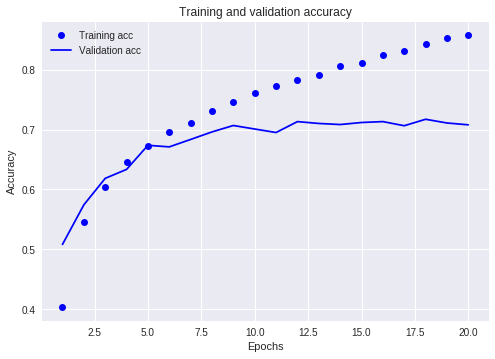

In [25]:
plotaccuracy(history_cnn)

### Evaluating the CNN

In [26]:
score = cnn_model.evaluate(X_test, y_test, batch_size=64)

10000/10000 [==============================] - 1s 73us/step


In [27]:
print(cnn_model.metrics_names)
print(score)

['loss', 'acc']
[0.9778557587623596, 0.7058]


Based on above results, we can say that the CNN reached significantly higher accuracy than the MLP classifier, but overfitting occured during the training of our model. 

We may need to try some regularization techniques to resolve the overfitting problem.